# ***DNA CLASSIFICATION***


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING DATA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
import numpy as np
import seaborn as sns
!pip install Levenshtein
import Levenshtein
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import svm
import random
from itertools import islice

#imported csv data
dna= pd.read_csv('/content/drive/MyDrive/DNA.csv')

#printed the data
print(dna)

#Total number of rows
print('Total number of rows= ',dna.shape[0])
dna.info()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
                                               sequence  class
0     ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1     ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4     ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3
...                                                 ...    ...
4375  ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...      0
4376  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6
4377  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6
4378  ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...      6
4379  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6

[4380 rows x 2 columns]
Total number of rows=  4380
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (tota

**FIRST DNA VALUE**

In [ ]:
#Sample dna value
display(dna["sequence"][0])
print(f'length of Sequence 1:{len(dna["sequence"][0])}')

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

length of Sequence 1:207


**TOTAL PERCENTAGE OF BASES IN DNA SEQUENCES**

In [ ]:
def compute_percentage(dna_seq):
    total_length = len(dna_seq)
    a_count = dna_seq.count('A')
    c_count = dna_seq.count('C')
    t_count = dna_seq.count('T')
    g_count = dna_seq.count('G')
    percentage_a = (a_count / total_length) * 100
    percentage_c = (c_count / total_length) * 100
    percentage_t = (t_count / total_length) * 100
    percentage_g = (g_count / total_length) * 100
    result = {
        'A': percentage_a,
        'C': percentage_c,
        'T': percentage_t,
        'G': percentage_g
    }
    return result
s=""
for i in range(len(dna['sequence'])):
  s+=dna['sequence'][i]
print(compute_percentage(s))

{'A': 25.334597390001235, 'C': 26.31227186541591, 'T': 22.088468789400135, 'G': 26.2550857683047}


**DISTRIBUTION OF LENGTHS OF THE DNA SEQUENCE**

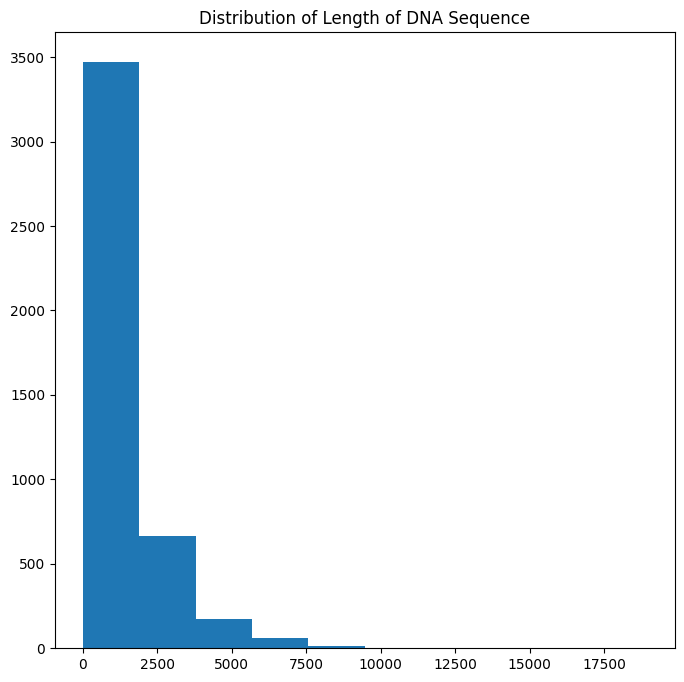

In [ ]:
dna["length"] = dna.sequence.apply(lambda x : len(x))
plt.figure(figsize=(8,8));
plt.hist(dna["length"],bins=10)
plt.title("Distribution of Length of DNA Sequence");

**GENERATE LIST OF DNA SEQUENCES**

In [ ]:
# Generate list of DNA sequences
classes = dna.loc[:, 'class']
sequences=list(dna.loc[:, 'sequence'])
dataset={}
# loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
    # split into nucleotides, remove tab characters
    nucleotides=list(seq)
    nucleotides=[x for x in nucleotides if x != '\t']
    # append class assignment
    nucleotides.append(classes[i])
    # add to dataset
    dataset[i] = nucleotides
print(dataset[0])

['A', 'T', 'G', 'C', 'C', 'C', 'C', 'A', 'A', 'C', 'T', 'A', 'A', 'A', 'T', 'A', 'C', 'T', 'A', 'C', 'C', 'G', 'T', 'A', 'T', 'G', 'G', 'C', 'C', 'C', 'A', 'C', 'C', 'A', 'T', 'A', 'A', 'T', 'T', 'A', 'C', 'C', 'C', 'C', 'C', 'A', 'T', 'A', 'C', 'T', 'C', 'C', 'T', 'T', 'A', 'C', 'A', 'C', 'T', 'A', 'T', 'T', 'C', 'C', 'T', 'C', 'A', 'T', 'C', 'A', 'C', 'C', 'C', 'A', 'A', 'C', 'T', 'A', 'A', 'A', 'A', 'A', 'T', 'A', 'T', 'T', 'A', 'A', 'A', 'C', 'A', 'C', 'A', 'A', 'A', 'C', 'T', 'A', 'C', 'C', 'A', 'C', 'C', 'T', 'A', 'C', 'C', 'T', 'C', 'C', 'C', 'T', 'C', 'A', 'C', 'C', 'A', 'A', 'A', 'G', 'C', 'C', 'C', 'A', 'T', 'A', 'A', 'A', 'A', 'A', 'T', 'A', 'A', 'A', 'A', 'A', 'A', 'T', 'T', 'A', 'T', 'A', 'A', 'C', 'A', 'A', 'A', 'C', 'C', 'C', 'T', 'G', 'A', 'G', 'A', 'A', 'C', 'C', 'A', 'A', 'A', 'A', 'T', 'G', 'A', 'A', 'C', 'G', 'A', 'A', 'A', 'A', 'T', 'C', 'T', 'G', 'T', 'T', 'C', 'G', 'C', 'T', 'T', 'C', 'A', 'T', 'T', 'C', 'A', 'T', 'T', 'G', 'C', 'C', 'C', 'C', 'C', 'A', 'C', 'A',

**K-MERS OF LENGTH 6**


In [ ]:
# function to convert sequences strings into k-mer words with size 6
def getKmers(sequence,size=6):
    return[sequence[x:x+size].lower() for x in range(len(sequence)-size + 1 )]
dna['words'] = dna.apply(lambda x: getKmers(x['sequence']), axis=1)
#inserted a new row with k-mer values of that row
dna.head()

,sequence,class,length,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,207,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,681,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1686,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1206,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,1437,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


**JACCARD SIMILARITY**

In [ ]:
#define Jaccard Similarity function
def jaccard(list1,list2):
    intersection = len(list(set(list1).intersection(set(list2))))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) /union

#find Jaccard Similarity between the two sets
max2=0.0000
print()
for i in range(2000):
    k=jaccard(dna["words"][i],dna["words"][i+1])
    if(k==1):
        continue
    if(k>max2 and max2<0.99):
        max2=k
        print(k,end="")
        a=dna["words"][i]
        b=dna["words"][i+1]
        print(" of",len(dna["words"][i]),"and",len(dna["words"][i+1]),"length sequence")
print("Maximum Jaccard similarity percentage=",max2*100)



0.136431784107946 of 202 and 676 length sequence
0.7201907790143084 of 1681 and 1201 length sequence
0.8877221324717286 of 1432 and 1681 length sequence
0.9733441033925686 of 1681 and 1618 length sequence
0.996031746031746 of 892 and 889 length sequence
Maximum Jaccard similarity percentage= 99.60317460317461


**LEVENSHTEIN DISTANCE**

In [ ]:
#Levenshtein distance
c=Levenshtein.distance(a,b)
print("There is only",c,"elements of difference between the two DNA's")

There is only 6 elements of difference between the two DNA's


**JACCARD SIMILARITY HEATMAP**

<Axes: >

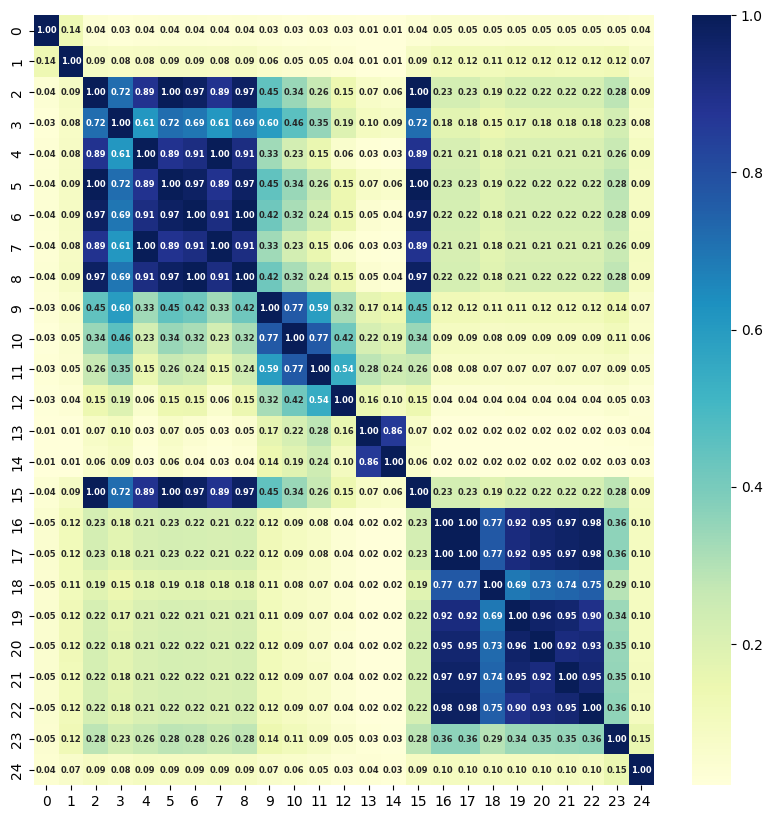

In [ ]:
M = np.zeros((25,25))
for i in range(25):
    for j in range(25):
        M[i,j]=jaccard(dna["words"][i],dna["words"][j])
similarity_df = pd.DataFrame(M)
plt.figure(figsize=(10,10))
sns.heatmap(
			similarity_df,
			annot=True,
			robust=True,
			fmt='.2f',
			annot_kws={'size':6, 'fontweight': 'bold'},
			cmap="YlGnBu",
)

**JACCARD SIMILARITY BETWEEN MOTHER AND HER SON AND DAUGHTER**

In [ ]:
mother=['cggtca','atgctt','aagtcc','tgatcc','ggtcaa','tgctca','agtcct','tacctc', 'acctcc', 'cctccc', 'ctgcct', 'tccctc', 'cccaca', 'cctcac', 'ctcacc', 'tcacca', 'caccaa', 'accaaa', 'ccaaag', 'caaagc', 'aaagcc', 'aagccc', 'agccca', 'gcccat', 'cccata', 'ccataa', 'cataaa', 'ataaaa', 'taaaaa', 'aaaaat', 'aaaata', 'aaataa', 'aataaa', 'ataaaa', 'taaaaa', 'aaaaaa', 'aaaaat', 'aaaatt', 'aaatta', 'aattat', 'attata', 'ttataa', 'tataac', 'atagca', 'taacaa', 'aacaaa', 'acaaac', 'caaacc', 'aaaccc', 'aacgct', 'accctg', 'ccctga', 'cctgag', 'ctgaga', 'tgggaa', 'gagaac', 'agaacc', 'gaacca', 'aaccaa', 'accaaa', 'ccaaaa', 'caaaat', 'aaaatg', 'aaatga', 'aatgaa', 'atgaac', 'tgaacg', 'gaacga', 'aacgaa', 'acgaaa', 'cgaaaa', 'gaaaat', 'aaaatc', 'aaatct', 'aatctg']
daughter=['cagact','atgctt','aagtcc','tgatcc','ggtcga','tgctca','agtcct','tacctc', 'acctcc', 'cctcac', 'ctgcct', 'tccctc', 'ccctca', 'cctcac', 'ctcacc', 'tcacca', 'caccaa', 'accaaa', 'ccaaag', 'caaagc', 'aaagcc', 'aagccc', 'agccca', 'gcccat', 'cccata', 'ccataa', 'cataaa', 'ataaaa', 'taaaaa', 'aaaaat', 'aaaata', 'aaataa', 'aataaa', 'ataaaa', 'taaaaa', 'aaaaaa', 'aaaaat', 'aaaatt', 'aaatta', 'aattat', 'attata', 'ttataa', 'tataac', 'atagca', 'taacaa', 'aacaaa', 'acaaac', 'caaacc', 'aaagcc', 'aaccct', 'accctg', 'ccctga', 'cctgag', 'cagaga', 'tgagaa', 'gagaac', 'agaacc', 'gaacca', 'aaccaa', 'accaaa', 'ccaaaa', 'caaaat', 'aaaatg', 'aaatga', 'aatgaa', 'atgaac', 'tgaacg', 'gaacga', 'aacgaa', 'acgaaa', 'cgaaaa', 'gaaaat', 'aaaatc', 'aaatct']
son=['cggtcg','atgctc','aagtcg','tgatcc','ggtcaa','tgctca','agtcct','tacctc', 'acctcc', 'cctccc', 'ctccct', 'tccctc', 'cccaca', 'cctcac', 'ctcacc', 'tcacca', 'caccaa', 'accaaa', 'ccaaag', 'caaagc', 'aaagcc', 'aagccc', 'agccca', 'gcccat', 'cccata', 'ccataa', 'cataaa', 'ataaaa', 'taaaaa', 'aaaaat', 'aaaata', 'aaataa', 'aataaa', 'ataaaa', 'taaaaa', 'aaaaaa', 'aaaaat', 'aaaatt', 'aaatta', 'aattat', 'attata', 'ttataa', 'tataac', 'ataaca', 'tgacaa', 'aacaaa', 'acaaac', 'caaacc', 'aaatcc', 'aaccct', 'accctg', 'ccctga', 'cctgag', 'ctgaga', 'tgagaa', 'gagaac', 'agaacc', 'gaacca', 'aaccaa', 'accaaa', 'ccaaaa', 'caaaat', 'aaaatg', 'aaatga', 'aatgaa', 'atgaac', 'tgaacg', 'gaacga', 'aacgaa', 'acgaaa', 'cgaaaa', 'gaaaat', 'aaaatc', 'aaatct']
print(jaccard(mother,daughter))
print("Similarity percentage-",jaccard(mother,daughter)*100)
print(jaccard(mother,son))
print("Similarity percentage-",jaccard(mother,son)*100)
print(jaccard(son,daughter))
print("Similarity percentage-",jaccard(son,daughter)*100)

0.8051948051948052
Similarity percentage- 80.51948051948052
0.7625
Similarity percentage- 76.25
0.7468354430379747
Similarity percentage- 74.68354430379746


**CONVERT LIST ELEMENTS TO SINGLE SENTENCES (DATA PREPARATION)**

In [ ]:
#converted the whole column into list
human_texts=list(dna['words'])
#converted the inner lists into single sentences
for item in range(len(human_texts)):
    human_texts[item]=' '.join(human_texts[item])
print(human_texts[0:100])
#sequence column values
y_data= dna.iloc[:,1].values


['atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaa

**COUNT VECTORIZER**

**K=4**

In [ ]:
#it counts the no. of times the four words occur in the string
cv= CountVectorizer(ngram_range=(4,4))
x= cv.fit_transform(human_texts)
i=0
max3=0
count=0
for key,value in cv.vocabulary_.items():
    if(max3<value):
        max3=value;
        key2=key;
    if i<=10:
      print(f"{key} : {value}")
    i+=1

atgccc tgcccc gcccca ccccaa : 52803
tgcccc gcccca ccccaa cccaac : 207969
gcccca ccccaa cccaac ccaact : 136621
ccccaa cccaac ccaact caacta : 79202
cccaac ccaact caacta aactaa : 78295
ccaact caacta aactaa actaaa : 74681
caacta aactaa actaaa ctaaat : 60650
aactaa actaaa ctaaat taaata : 6563
actaaa ctaaat taaata aaatac : 25724
ctaaat taaata aaatac aatact : 101750
taaata aaatac aatact atacta : 176196


**MOST COMMON N-GRAMS AMONG THE DNA WITH K=4**

In [ ]:
keys = list(cv.vocabulary_.keys())
values = list(cv.vocabulary_.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
dict(islice(sorted_dict.items(), 0,20))

#Thymine rich DNA sequences

{'tttttt tttttt tttttt tttttt': 232413,
 'tttttt tttttt tttttt tttttg': 232412,
 'tttttt tttttt tttttt tttttc': 232411,
 'tttttt tttttt tttttt ttttta': 232410,
 'tttttt tttttt tttttg ttttgt': 232409,
 'tttttt tttttt tttttg ttttgg': 232408,
 'tttttt tttttt tttttg ttttgc': 232407,
 'tttttt tttttt tttttg ttttga': 232406,
 'tttttt tttttt tttttc ttttct': 232405,
 'tttttt tttttt tttttc ttttcg': 232404,
 'tttttt tttttt tttttc ttttcc': 232403,
 'tttttt tttttt tttttc ttttca': 232402,
 'tttttt tttttt ttttta ttttat': 232401,
 'tttttt tttttt ttttta ttttag': 232400,
 'tttttt tttttt ttttta ttttac': 232399,
 'tttttt tttttt ttttta ttttaa': 232398,
 'tttttt tttttg ttttgt tttgtt': 232397,
 'tttttt tttttg ttttgt tttgtg': 232396,
 'tttttt tttttg ttttgt tttgtc': 232395,
 'tttttt tttttg ttttgt tttgta': 232394}

**K=1**

In [ ]:
#it counts the no. of times the four words occur in the string
cv2= CountVectorizer(ngram_range=(1,1))
x2= cv2.fit_transform(human_texts)
i=0
max1=0
for key,value in cv2.vocabulary_.items():
    if(max1<value):
        max1=value;
        key2=key;
    if i<=10:
      print(f"{key} : {value}")
    i+=1

atgccc : 917
tgcccc : 4042
gcccca : 2388
ccccaa : 1360
cccaac : 1345
ccaact : 1287
caacta : 1052
aactaa : 112
actaaa : 448
ctaaat : 1795
taaata : 3457


**MOST COMMON N-GRAMS AMONG THE DNA WITH k=1**

In [ ]:
keys = list(cv2.vocabulary_.keys())
values = list(cv2.vocabulary_.values())
sorted_value_index2 = np.argsort(values)[::-1]
sorted_dict2 = {keys[i]: values[i] for i in sorted_value_index2}
dict(islice(sorted_dict2.items(), 0,20))

{'tttttt': 4468,
 'tttttg': 4467,
 'tttttc': 4466,
 'ttttta': 4465,
 'ttttgt': 4464,
 'ttttgg': 4463,
 'ttttgc': 4462,
 'ttttga': 4461,
 'ttttct': 4460,
 'ttttcg': 4459,
 'ttttcc': 4458,
 'ttttca': 4457,
 'ttttat': 4456,
 'ttttag': 4455,
 'ttttac': 4454,
 'ttttaa': 4453,
 'tttgtt': 4452,
 'tttgtg': 4451,
 'tttgtc': 4450,
 'tttgta': 4449}

##### K=6

In [ ]:
#it counts the no. of times the four words occur in the string
cv= CountVectorizer(ngram_range=(6,6))
x= cv.fit_transform(human_texts)
i=0
max3=0
for key,value in cv.vocabulary_.items():
    if(max3<value):
        max3=value;
        key2=key;
    if i<=10:
      print(f"{key} : {value}")
    i+=1

atgccc tgcccc gcccca ccccaa cccaac ccaact : 236755
tgcccc gcccca ccccaa cccaac ccaact caacta : 917217
gcccca ccccaa cccaac ccaact caacta aactaa : 623751
ccccaa cccaac ccaact caacta aactaa actaaa : 369469
cccaac ccaact caacta aactaa actaaa ctaaat : 363985
ccaact caacta aactaa actaaa ctaaat taaata : 343135
caacta aactaa actaaa ctaaat taaata aaatac : 271298
aactaa actaaa ctaaat taaata aaatac aatact : 30851
actaaa ctaaat taaata aaatac aatact atacta : 114896
ctaaat taaata aaatac aatact atacta tactac : 454629
taaata aaatac aatact atacta tactac actacc : 792495


**MOST COMMON N-GRAMS AMONG THE DNA WITH k=6**

In [ ]:
keys = list(cv.vocabulary_.keys())
values = list(cv.vocabulary_.values())
sorted_value_index2 = np.argsort(values)[::-1]
sorted_dict2 = {keys[i]: values[i] for i in sorted_value_index2}
dict(islice(sorted_dict2.items(), 0,20))

{'tttttt tttttt tttttt tttttt tttttg ttttgt': 1025991,
 'tttttt tttttt tttttt tttttt tttttg ttttgg': 1025990,
 'tttttt tttttt tttttt tttttt tttttc ttttcc': 1025989,
 'tttttt tttttt tttttt tttttt tttttc ttttca': 1025988,
 'tttttt tttttt tttttt tttttg ttttgt tttgtt': 1025987,
 'tttttt tttttt tttttt tttttg ttttgg tttggg': 1025986,
 'tttttt tttttt tttttt tttttg ttttgc tttgct': 1025985,
 'tttttt tttttt tttttt tttttc ttttct tttctt': 1025984,
 'tttttt tttttt tttttt tttttc ttttcc tttcct': 1025983,
 'tttttt tttttt tttttt tttttc ttttca tttcat': 1025982,
 'tttttt tttttt tttttt tttttc ttttca tttcac': 1025981,
 'tttttt tttttt tttttt ttttta ttttat tttatt': 1025980,
 'tttttt tttttt tttttg ttttgt tttgtt ttgtta': 1025979,
 'tttttt tttttt tttttg ttttgt tttgtg ttgtgg': 1025978,
 'tttttt tttttt tttttg ttttgt tttgta ttgtat': 1025977,
 'tttttt tttttt tttttg ttttgg tttggt ttggtc': 1025976,
 'tttttt tttttt tttttg ttttgg tttggg ttggga': 1025975,
 'tttttt tttttt tttttg ttttgg tttgga ttggaa': 1025974,
 'tttttt t

**CLASS BALANCE**

<Axes: >

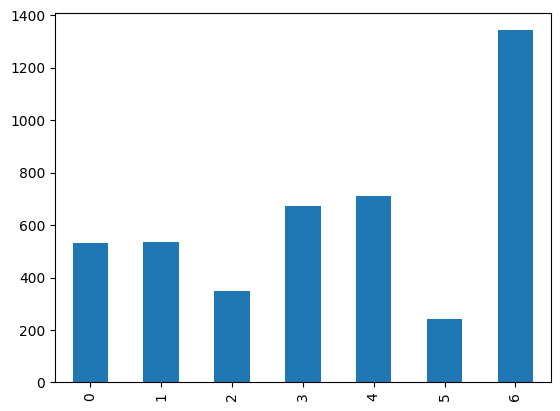

In [ ]:
dna['class'].value_counts().sort_index().plot.bar()

#### SPLIT DATA INTO TESTING AND TRAINING DATA

In [ ]:
#Splitting the human dataset into training set and test set
X_train,X_test,y_train, y_test = train_test_split(x[0:2000],y_data[0:2000], test_size = 0.20,random_state=42)

### NAIVE BAYES (MODEL 1)

In [ ]:
from sklearn.model_selection import train_test_split
results=[]
X_train_human, X_test_human, y_train_human, y_test_human = train_test_split(x,y_data,test_size = 0.25,random_state=42)
from sklearn.naive_bayes import MultinomialNB #importing the decisiontreeclassifier algorithm from sklearn
NB_human = MultinomialNB(alpha=0.1)
NB_human.fit(X_train_human,y_train_human)
y_pred_human = NB_human.predict(X_test_human)
nb_accuracy_human = accuracy_score(y_pred_human,y_test_human)
print("Accuracy for human data using Naive Bayes Classifier : " ,nb_accuracy_human)

Accuracy for human data using Naive Bayes Classifier :  0.9616438356164384


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

# Create the grid search object
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_human, y_train_human)

# Get the best estimator and print its hyperparameters
best_nb = grid_search.best_estimator_
print('Best hyperparameters:', best_nb.get_params())

# Make predictions on the testing set using the best estimator
y_pred_human_tuned = best_nb.predict(X_test_human)

# Calculate the accuracy score
nb_accuracy_human_tuned = accuracy_score(y_pred_human_tuned, y_test_human)
print('Accuracy for human data using tuned Naive Bayes Classifier:', nb_accuracy_human_tuned)

### Performance Metrics for Naive Bayes model

In [ ]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test_human, name='Actual'), pd.Series(y_pred_human, name='Predicted')))
def get_metrics(y_test,y_predicted):
    accuracy=accuracy_score(y_test,y_predicted)
    precision=precision_score(y_test,y_predicted,average='weighted')
    recall=recall_score(y_test,y_predicted,average='weighted')
    f1=f1_score(y_test,y_predicted,average='weighted')
    return accuracy,precision,recall,f1
accuracy_naivebayes, precision_naivebayes, recall_naivebayes, f1_naivebayes = get_metrics(y_test_human, y_pred_human)
print("accuracy_naivebayes = %.3f \nprecision_naivebayes = %.3f \nrecall_naivebayes = %.3f \nf1_naivebayes = %.3f" % (accuracy_naivebayes, precision_naivebayes, recall_naivebayes, f1_naivebayes))


Confusion matrix

Predicted    0    1   2    3    4   5    6
Actual                                    
0          111    0   0    0    1   9    0
1            0  129   0    0    0   2    0
2            0    0  92    0    1   0    0
3            0    0   0  149    0   1    0
4            0    0   0    0  179   5    0
5            0    1   0    0    0  64    0
6            0    0   0    0    3  19  329
accuracy_naivebayes = 0.962 
precision_naivebayes = 0.973 
recall_naivebayes = 0.962 
f1_naivebayes = 0.965


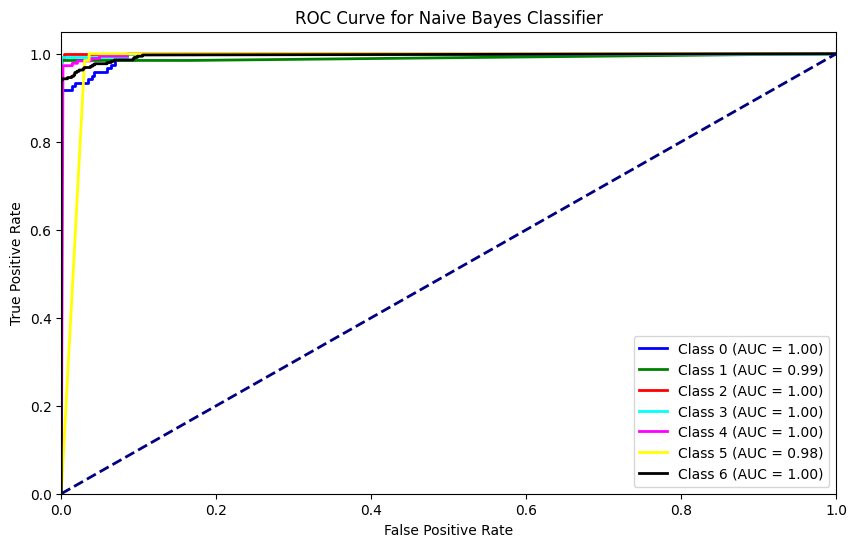

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
y_pred_proba_human = NB_human.predict_proba(X_test_human)

# Compute ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(NB_human.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_human, y_pred_proba_human[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='Class %s (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()


### Random Forest Model (Model 2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier #importing the RandomForestclassifier algorithm from sklearn
rf_human = RandomForestClassifier(n_estimators=400)
rf_human.fit(X_train_human,y_train_human)
rf_human_pred = rf_human.predict(X_test_human)
print("Accuracy for human data using RandomForest Classifier : ",accuracy_score(rf_human_pred,y_test_human))

Accuracy for human data using RandomForest Classifier :  0.9223744292237442


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Split data into training and testing sets
X_train_human, X_test_human, y_train_human, y_test_human = train_test_split(x, y_data, test_size=0.25, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 400, 600],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier object
rf_human = RandomForestClassifier()

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_human, param_grid=param_grid, cv=5)
grid_search.fit(X_train_human, y_train_human)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Use the best hyperparameters to train and evaluate the model
rf_human_best = RandomForestClassifier(**grid_search.best_params_)
rf_human_best.fit(X_train_human, y_train_human)
rf_human_best_pred = rf_human_best.predict(X_test_human)
print("Accuracy for human data using RandomForest Classifier with best hyperparameters: ", accuracy_score(rf_human_best_pred, y_test_human))

### Performance Metrics for Random Forest model

In [ ]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(rf_human_pred, name='Predicted')))
def get_metrics(y_test,y_predicted):
    accuracy=accuracy_score(y_test,y_predicted)
    precision=precision_score(y_test,y_predicted,average='weighted')
    recall=recall_score(y_test,y_predicted,average='weighted')
    f1=f1_score(y_test,y_predicted,average='weighted')
    return accuracy,precision,recall,f1
rf_accuracy, rf_precision, rf_recall, rf_f1 = get_metrics(y_test_human, rf_human_pred)
print("rf_accuracy = %.3f \nrf_precision = %.3f \nrf_recall = %.3f \nrf_f1 = %.3f" % (rf_accuracy, rf_precision, rf_recall, rf_f1))

Confusion matrix

Predicted  0   1   2   3   4   5   6
Actual                              
0          3   8   2   2   3   1  19
1          7   6   7   8   9   4  20
2          4   1   3   5   5   1  10
3          5  10   8  11   9   3  34
4          5   6   1   5   9   3  16
5          3   0   1   3   9   0   4
6          9  14  10  18  19  10  47
rf_accuracy = 0.922 
rf_precision = 0.938 
rf_recall = 0.922 
rf_f1 = 0.924


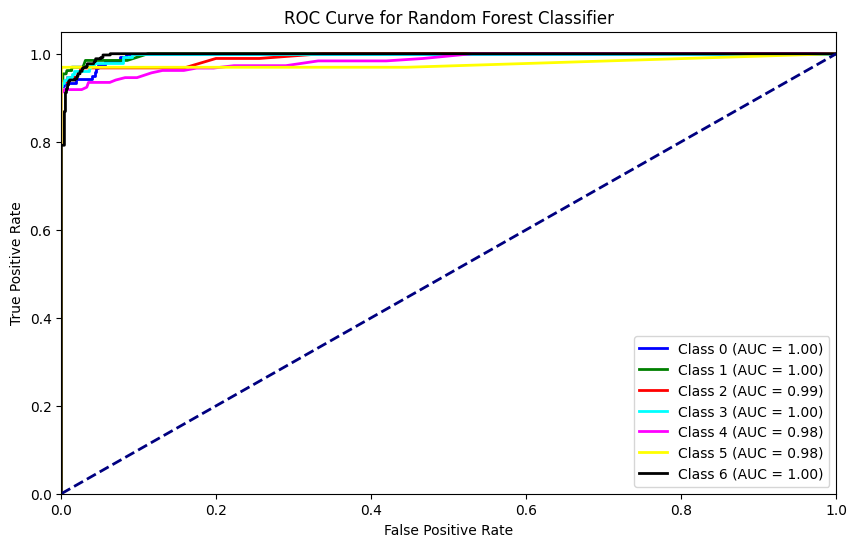

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
y_pred_proba_human = rf_human.predict_proba(X_test_human)

# Compute ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(NB_human.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_human, y_pred_proba_human[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='Class %s (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

#### SVM Model (MODEL 3)

In [ ]:
clf = svm.SVC(kernel='linear',probability=True)

# train the model on the training set
clf.fit(X_train, y_train)

# make predictions on the testing set
y_pred_svm = clf.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [1e-4, 1e-3, 1e-2, 1e-1, 1]
}

# create an instance of the SVM model
svm_model = svm.SVC()

# create an instance of the Grid Search object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# train the model using Grid Search
grid_search.fit(X_train, y_train)

# print the best hyperparameters found by Grid Search
print('Best hyperparameters:', grid_search.best_params_)

# evaluate the model with the best hyperparameters on the testing set
y_pred_svm_tuned = grid_search.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred_svm_tuned))

#### Performance Metrics for SVM model

In [ ]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred_svm, name='Predicted')))
def get_metrics(y_test,y_predicted):
    accuracy=accuracy_score(y_test,y_predicted)
    precision=precision_score(y_test,y_predicted,average='weighted')
    recall=recall_score(y_test,y_predicted,average='weighted')
    f1=f1_score(y_test,y_predicted,average='weighted')
    return accuracy,precision,recall,f1
accuracy_svm, precision_svm, recall_svm, f1_svm = get_metrics(y_test, y_pred_svm)
print("accuracy_svm = %.3f \nprecision_svm = %.3f \nrecall_svm = %.3f \nf1_svm = %.3f" % (accuracy_svm, precision_svm, recall_svm, f1_svm))

Confusion matrix

Predicted   0   1   2   3   4   5    6
Actual                                
0          26   0   0   0   0   0   12
1           0  45   0   0   0   0   16
2           0   0  25   0   0   0    4
3           0   0   0  59   0   0   21
4           0   0   0   0  33   0   12
5           0   0   0   0   0  11    9
6           0   0   0   0   0   0  127
accuracy_svm = 0.815 
precision_svm = 0.883 
recall_svm = 0.815 
f1_svm = 0.820


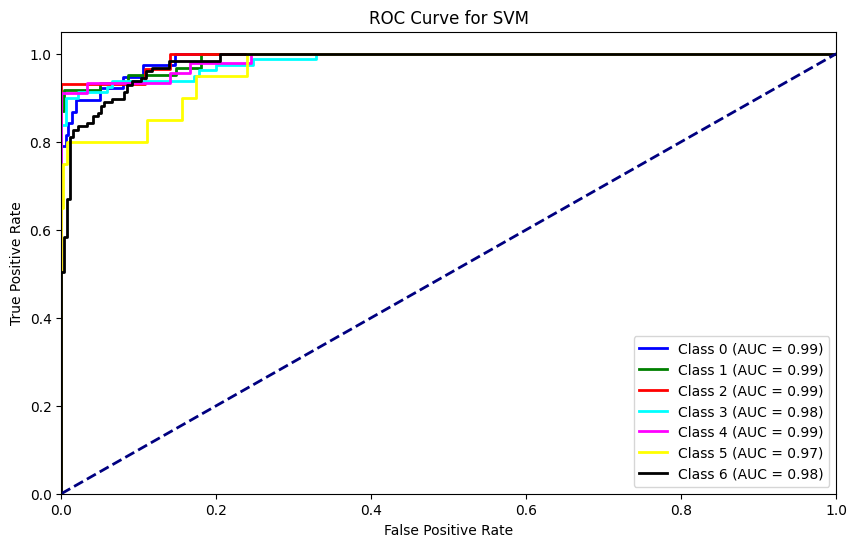

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
y_pred_proba_human = clf.predict_proba(X_test)

# Compute ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(NB_human.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba_human[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='Class %s (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()


#### XGBOOST (ML MODEL 4)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Define hyperparameters to test
learning_rates = [0.1, 0.05, 0.01]
max_depths = [3, 5, 7]
n_estimators = [100, 200, 300]

# Loop over hyperparameters and train models
best_accuracy = 0
best_model = None
for lr in learning_rates:
    for md in max_depths:
        for n_est in n_estimators:
            # Create an XGBoost model with current hyperparameters
            model = XGBClassifier(learning_rate=lr, max_depth=md, n_estimators=n_est)

            # Train the model
            model.fit(X_train, y_train)

            # Make predictions on the test data
            y_pred = model.predict(X_test)

            # Calculate accuracy score
            accuracy = accuracy_score(y_test, y_pred)
            print(f"Accuracy: {accuracy} | Learning rate: {lr} | Max depth: {md} | Estimators: {n_est}")

            # Check if current model is best so far
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model

print(f"Best accuracy: {best_accuracy}")
print(f"Best model: {best_model}")


In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Create an XGBoost model
model = XGBClassifier()

# Train the modela
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)

Accuracy: 0.855
Confusion Matrix:
 [[ 27   1   0   0   0   0  10]
 [  0  49   0   0   0   0  12]
 [  0   1  26   0   0   0   2]
 [  0   0   0  63   0   0  17]
 [  0   0   0   0  37   0   8]
 [  0   1   0   0   0  13   6]
 [  0   0   0   0   0   0 127]]


#### Performance Metrics for XGBoost model

In [ ]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test,y_predicted):
    accuracy=accuracy_score(y_test,y_predicted)
    precision=precision_score(y_test,y_predicted,average='weighted')
    recall=recall_score(y_test,y_predicted,average='weighted')
    f1=f1_score(y_test,y_predicted,average='weighted')
    return accuracy,precision,recall,f1
accuracy_xgb,precision_xgb,recall_xgb,f1_xgb=get_metrics(y_test,y_pred)
print("accuracy_xgb = %.3f \nprecision_xgb = %.3f \nrecall_xgb = %.3f \nf1_xgb = %.3f" % (accuracy_xgb, precision_xgb, recall_xgb, f1_xgb))

Confusion matrix

Predicted   0   1   2   3   4   5    6
Actual                                
0          27   1   0   0   0   0   10
1           0  49   0   0   0   0   12
2           0   1  26   0   0   0    2
3           0   0   0  63   0   0   17
4           0   0   0   0  37   0    8
5           0   1   0   0   0  13    6
6           0   0   0   0   0   0  127
accuracy_xgb = 0.855 
precision_xgb = 0.895 
recall_xgb = 0.855 
f1_xgb = 0.858


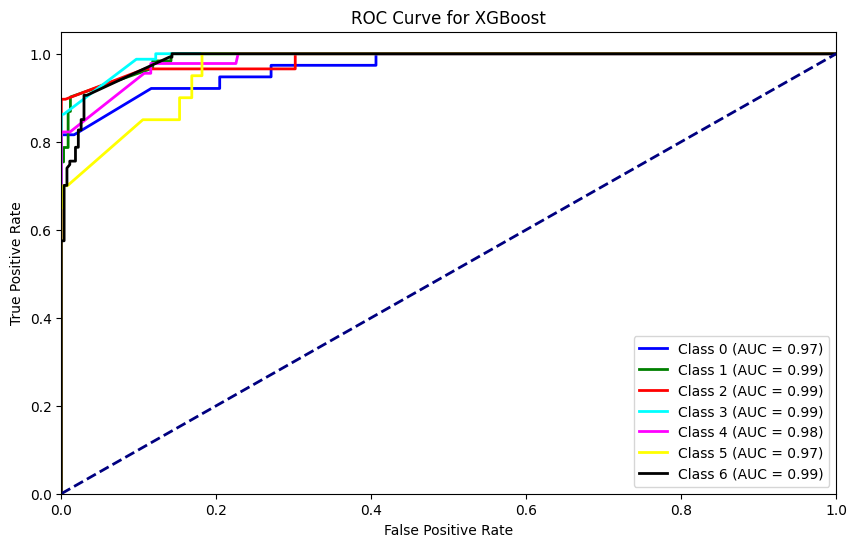

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
y_pred_proba_human = model.predict_proba(X_test)

# Compute ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(NB_human.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba_human[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='Class %s (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

In [ ]:
dict={"Model Name":["Accuracy","Precision","Recall","F1"],
      "Naive Bayes":results[0],
       "Random Forest":results[1],
       "SVM":results[2],
      "XGBoost":results[3]}
df = pd.DataFrame(dict)

# displaying the DataFrame
display(df)

### Voting - Expert System

### Knowledge Base

In [ ]:
# Assign weights to evaluation metrics
weights = {
    'accuracy': 0.4,
    'precision': 0.2,
    'recall': 0.1,
    'f1-score': 0.3
}

# Calculate weighted averages for each model
nb_weighted_avg = sum([accuracy_naivebayes*weights['accuracy'], precision_naivebayes*weights['precision'], recall_naivebayes*weights['recall'], f1_naivebayes*weights['f1-score']])
rf_weighted_avg = sum([rf_accuracy*weights['accuracy'], rf_precision*weights['precision'], rf_recall*weights['recall'], rf_f1*weights['f1-score']])
svm_weighted_avg = sum([accuracy_svm*weights['accuracy'], precision_svm*weights['precision'], recall_svm*weights['recall'], f1_svm*weights['f1-score']])
xgb_weighted_avg = sum([accuracy_xgb*weights['accuracy'], precision_xgb*weights['precision'], recall_xgb*weights['recall'], f1_xgb*weights['f1-score']])
results=[]
results.append((accuracy_naivebayes,precision_naivebayes,recall_naivebayes,f1_naivebayes))
results.append((rf_accuracy,rf_precision,rf_recall,rf_f1))
results.append((accuracy_svm,precision_svm,recall_svm,f1_svm))
results.append((accuracy_xgb,precision_xgb,recall_xgb,f1_xgb))


### Inference Engine

In [ ]:

# Print weighted averages for each model
print('Weighted averages:')
print('Naive Bayes: %.3f' % nb_weighted_avg)
print('Random Forest: %.3f' % rf_weighted_avg)
print('SVM: %.3f' % svm_weighted_avg)
print('XGBoost: %.3f' % xgb_weighted_avg)

# Choose the model with the highest weighted average
if nb_weighted_avg >= rf_weighted_avg and nb_weighted_avg >= svm_weighted_avg and nb_weighted_avg >= xgb_weighted_avg:
    res=1
elif rf_weighted_avg >= svm_weighted_avg and rf_weighted_avg >= xgb_weighted_avg:
    res=2
elif svm_weighted_avg >= xgb_weighted_avg:
    res=3
else:
    res=4

### User Interface

In [ ]:
if res==1:
  print("We Choose Naive Bayes Model")
elif res==2:
  print("We Choose Random Forest Model")
elif res==3:
  print("We Choose SVM Model")
else:
  print("We Choose XGBoost Model")

## Generating Family DNA Sequence

In [ ]:
# Define the possible nucleotides
nucleotides = ['A', 'C', 'G', 'T']

# Generate a random DNA sequence for the mother
mother_dna = ''.join([random.choice(nucleotides) for i in range(2000)])

# Generate a random DNA sequence for the father
father_dna = ''.join([random.choice(nucleotides) for i in range(2000)])

# Generate a random crossover point between the two DNA sequences
crossover_point = random.randint(300,1700)

# Generate the daughter's DNA sequence by combining the mother's and father's DNA sequences
daughter_dna = mother_dna[:crossover_point] + father_dna[crossover_point:]
# Print the DNA sequences
print("Mother's DNA sequence:", mother_dna)
print("Daughter's DNA sequence:", daughter_dna)
def similarity_percentage(seq1, seq2):
    if len(seq1) != len(seq2):
        print("Error: Sequences must have the Same Length")
        return None
    matches = 0
    for i in range(len(seq1)):
        if seq1[i] == seq2[i]:
            matches += 1
    similarity = matches / len(seq1) * 100
    return similarity
seq1 = mother_dna
seq2 = daughter_dna
similarity = similarity_percentage(seq1, seq2)
print("The similarity between seq1 and seq2 is {:.2f}%".format(similarity))


#### SMITH WATERMAN SEQUENCE ALIGNMENT ALGORITHM

In [ ]:
def smith_waterman(sequence1, sequence2, match_score=1, mismatch_penalty=-1, gap_penalty=-1):
    # Create the scoring matrix
    score_matrix = [[0] * (len(sequence2) + 1) for _ in range(len(sequence1) + 1)]
    # Initialize the traceback matrix
    traceback_matrix = [[0] * (len(sequence2) + 1) for _ in range(len(sequence1) + 1)]
    max_score=0
    max_i=0
    max_j=0
    # Fill the scoring matrix
    for i in range(1, len(sequence1) + 1):
        for j in range(1, len(sequence2) + 1):
            # Calculate the scores for the three possible operations: match, mismatch, and gap
            match1 = score_matrix[i - 1][j - 1] + (match_score if sequence1[i - 1] == sequence2[j - 1] else mismatch_penalty)
            delete = score_matrix[i - 1][j] + gap_penalty
            insert = score_matrix[i][j - 1] + gap_penalty
            # Choose the maximum score among the three operations
            l=[0,match1,delete,insert]
            l.sort()
            score_matrix[i][j] = l[3]
            # Update the traceback matrix
            if score_matrix[i][j] == 0:
                traceback_matrix[i][j] = 0
            elif score_matrix[i][j] == match1:
                traceback_matrix[i][j] = 1
            elif score_matrix[i][j] == delete:
                traceback_matrix[i][j] = 2
            else:
                traceback_matrix[i][j] = 3
            # Update the maximum score and its position in the scoring matrix
            if score_matrix[i][j] > max_score:
                max_score = score_matrix[i][j]
                max_i = i
                max_j = j
    # Traceback to find the optimal alignment
    aligned_sequence1 = ''
    aligned_sequence2 = ''
    i = max_i
    j = max_j
    while i > 0 or j > 0:
        if traceback_matrix[i][j] == 1:
            aligned_sequence1 = sequence1[i - 1] + aligned_sequence1
            aligned_sequence2 = sequence2[j - 1] + aligned_sequence2
            i -= 1
            j -= 1
        elif traceback_matrix[i][j] == 2:
            aligned_sequence1 = sequence1[i - 1] + aligned_sequence1
            aligned_sequence2 = '-' + aligned_sequence2
            i -= 1
        else:
            aligned_sequence1 = '-' + aligned_sequence1
            aligned_sequence2 = sequence2[j - 1] + aligned_sequence2
            j -= 1
    return aligned_sequence1, aligned_sequence2, max_score
a=smith_waterman(mother_dna,daughter_dna, match_score=1, mismatch_penalty=-1, gap_penalty=-1)
print(a[0],"\n",a[1],"\n",a[2])
b=smith_waterman(father_dna,daughter_dna, match_score=1, mismatch_penalty=-1, gap_penalty=-1)
print(b[0],"\n",b[1],"\n",b[2])


#### GENERATIONAL DNA CHANGE

In [ ]:
# Generate random DNA sequence of length 1000
dna_sequence = ''.join(random.choice('ACGT') for _ in range(10000))
parent_dna=dna_sequence
# Define the number of characters to change in each cycle
k = 10

#GENERATION 1
# Perform 10000 cycles of changing k random characters in the DNA sequence
for i in range(1000):
    # Generate k random indices to change in the DNA sequence
  indices_to_change = random.sample(range(len(dna_sequence)), k)
    # Modify the DNA sequence by changing the characters at the selected indices
  for index in indices_to_change:
    dna_sequence=dna_sequence[:index] + random.choice('ACGT') + dna_sequence[index+1:]
    # Print the modified DNA sequence after each cycle

print(Levenshtein.distance(parent_dna,dna_sequence),end=" ")
# Calculate the Levenshtein distance between the two DNA sequences
similarity = 1 - (Levenshtein.distance(parent_dna,dna_sequence) / max(len(parent_dna), len(dna_sequence)))
print(similarity)


parent_dna=dna_sequence
k=20

#GENERATION 2
for i in range(1000):
    # Generate k random indices to change in the DNA sequence
  indices_to_change = random.sample(range(len(dna_sequence)), k)
    # Modify the DNA sequence by changing the characters at the selected indices
  for index in indices_to_change:
    dna_sequence=dna_sequence[:index] + random.choice('ACGT') + dna_sequence[index+1:]
    # Print the modified DNA sequence after each cycle

print(Levenshtein.distance(parent_dna,dna_sequence),end=" ")
# Calculate the Levenshtein distance between the two DNA sequences
similarity = 1 - (Levenshtein.distance(parent_dna,dna_sequence) / max(len(parent_dna), len(dna_sequence)))
print(similarity)

parent_dna=dna_sequence
k=30

#GENERATION 3
for i in range(1000):
    # Generate k random indices to change in the DNA sequence
  indices_to_change = random.sample(range(len(dna_sequence)), k)
    # Modify the DNA sequence by changing the characters at the selected indices
  for index in indices_to_change:
    dna_sequence=dna_sequence[:index] + random.choice('ACGT') + dna_sequence[index+1:]
    # Print the modified DNA sequence after each cycle

print(Levenshtein.distance(parent_dna,dna_sequence),end=" ")
# Calculate the Levenshtein distance between the two DNA sequences
similarity = 1 - (Levenshtein.distance(parent_dna,dna_sequence) / max(len(parent_dna), len(dna_sequence)))
print(similarity)

parent_dna=dna_sequence
k=40

#GENERATION 4
for i in range(1000):
    # Generate k random indices to change in the DNA sequence
  indices_to_change = random.sample(range(len(dna_sequence)), k)
    # Modify the DNA sequence by changing the characters at the selected indices
  for index in indices_to_change:
    dna_sequence=dna_sequence[:index] + random.choice('ACGT') + dna_sequence[index+1:]
    # Print the modified DNA sequence after each cycle

print(Levenshtein.distance(parent_dna,dna_sequence),end=" ")
# Calculate the Levenshtein distance between the two DNA sequences
similarity = 1 - (Levenshtein.distance(parent_dna,dna_sequence) / max(len(parent_dna), len(dna_sequence)))
print(similarity)

#### K-MEANS CLUSTERING

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Standardize the data
scaler = StandardScaler(with_mean=False)
X_std = scaler.fit_transform(x)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_std)

# Print the cluster labels
print(kmeans.labels_)

# Calculate the silhouette score
score = silhouette_score(X_std, kmeans.labels_)
print("Silhouette Score:", score)